In [778]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [779]:

df = pd.read_excel('data_432.xlsx')
df

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq
0,1,23.0,1,107.0,192,1,2,4.0,3,1,2,4,7,2,12,2
1,2,22.0,2,49.0,160,1,2,5.0,2,1,1,3,7,2,3,3
2,3,23.0,1,56.0,175,1,2,8.0,3,3,1,3,8,2,8,4
3,4,21.0,2,53.0,170,2,2,4.0,2,4,2,3,8,2,2,4
4,5,53.0,2,57.0,162,2,3,1.0,2,3,4,2,6,2,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,428,67.0,2,70.0,164,2,5,1.0,5,4,1,3,8,2,30,1
428,429,55.0,1,65.0,176,1,2,4.0,1,2,4,3,6,2,1,4
429,430,54.0,1,80.0,172,1,2,3.0,2,2,3,3,7,1,100,2
430,431,55.0,2,54.0,158,2,5,0.0,5,4,4,4,6,2,0,1


In [780]:
df = df.dropna()

In [781]:
# check all the free response questions
# fix the value manually in excel
# Check age range
df[~df['age'].isin(range(1,101))]

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [782]:
# Check weight range
df[~((df['weight'] > 0) & (df['weight'] < 200))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [783]:
# Check hight range, fix the error manually
df[~((df['hight'] > 0) & (df['hight'] < 220))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [784]:
# Check drinking_freq range, fix the error manually
df[~((df['drinking_freq'] > 0) & (df['drinking_freq'] < 31))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [785]:
# Check sleep_length range, fix the error manually
df[~((df['sleep_length'] > 0) & (df['sleep_length'] < 15))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [786]:
# Check tolerance range, fix the error manually
df[~((df['tolerance'] >= 0) & (df['tolerance'] <= 100))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [787]:
# convert multiple choice answers to categorie values
df.loc[df["smoke"] == 2, "smoke"] = 0 
df.loc[df["sex"] == 1, "sex"] = "Male"
df.loc[df["sex"] == 2, "sex"]= "Female"


df.loc[df["drinking_freq"] == 1, "drinking_freq"] = "Daily"
df.loc[df["drinking_freq"] == 2, "drinking_freq"] = "Weekly"
df.loc[df["drinking_freq"] == 3, "drinking_freq"] = "Monthly"
df.loc[df["drinking_freq"] == 4, "drinking_freq"] = "Yearly"
df.loc[df["drinking_freq"] == 5, "drinking_freq"] = "Rarely"

df.loc[df["parent_freq"] == 1, "parent_freq"] = "Very often"
df.loc[df["parent_freq"] == 2, "parent_freq"] = "Often"
df.loc[df["parent_freq"] == 3, "parent_freq"] = "Not often"
df.loc[df["parent_freq"] == 4, "parent_freq"] = "Barely"
df.loc[df["parent_freq"] == 5, "parent_freq"] = "Never"

df.loc[df["eating_2"] == 1, "eating_2"] = "Always"
df.loc[df["eating_2"] == 2, "eating_2"] = "Often"
df.loc[df["eating_2"] == 3, "eating_2"] = "Sometimes"
df.loc[df["eating_2"] == 4, "eating_2"] = "Never"

df.loc[df["stress_level"] == 1, "stress_level"] = "Very stress"
df.loc[df["stress_level"] == 2, "stress_level"] = "Stress"
df.loc[df["stress_level"] == 3, "stress_level"] = "Not too stress"
df.loc[df["stress_level"] == 4, "stress_level"] = "Never stress"

df.loc[df["liver_cond"] == 2, "liver_cond"] = 0 

df.loc[df["workout_freq"] == 1, "workout_freq"] = "Very often"
df.loc[df["workout_freq"] == 2, "workout_freq"] = "Often"
df.loc[df["workout_freq"] == 3, "workout_freq"] = "Not often"
df.loc[df["workout_freq"] == 4, "workout_freq"] = "Barely"
df.loc[df["workout_freq"] == 5, "workout_freq"] = "Never"

c:\Users\718\anaconda3\envs\cse163\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [788]:
df['tolerance'] = df['tolerance'].apply(lambda x: np.random.randint(35,60) if x >= 60 else x)

df['tol_cat'] = df['tolerance'].apply(lambda x : "poor" if x < 3 else ("average" if x < 8 else ("ok" if x < 15 else ("good" if x < 30 else ('"excellent"' if x < 50 else "outstanding")))))

C:\Users\718\AppData\Local\Temp/ipykernel_13208/2494926727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tolerance'] = df['tolerance'].apply(lambda x: np.random.randint(35,60) if x >= 60 else x)
C:\Users\718\AppData\Local\Temp/ipykernel_13208/2494926727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tol_cat'] = df['tolerance'].apply(lambda x : "poor" if x < 3 else ("average" if x < 8 else ("ok" if x < 15 else ("good" if x < 30 else ('"excellent"' if x < 50 else "outstanding")))))


In [789]:
df

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq,tol_cat
0,1,23.0,Male,107.0,192,1,Weekly,4.0,3,Very often,Often,Never stress,7,0,12,Often,ok
1,2,22.0,Female,49.0,160,1,Weekly,5.0,2,Very often,Always,Not too stress,7,0,3,Not often,average
2,3,23.0,Male,56.0,175,1,Weekly,8.0,3,Not often,Always,Not too stress,8,0,8,Barely,ok
3,4,21.0,Female,53.0,170,0,Weekly,4.0,2,Barely,Often,Not too stress,8,0,2,Barely,poor
4,5,53.0,Female,57.0,162,0,Monthly,1.0,2,Not often,Never,Stress,6,0,50,Not often,outstanding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,428,67.0,Female,70.0,164,0,Rarely,1.0,5,Barely,Always,Not too stress,8,0,30,Very often,"""excellent"""
428,429,55.0,Male,65.0,176,1,Weekly,4.0,1,Often,Never,Not too stress,6,0,1,Barely,poor
429,430,54.0,Male,80.0,172,1,Weekly,3.0,2,Often,Sometimes,Not too stress,7,1,42,Often,"""excellent"""
430,431,55.0,Female,54.0,158,0,Rarely,0.0,5,Barely,Never,Never stress,6,0,0,Very often,poor


In [790]:
y = pd.get_dummies(df['tol_cat'])
x = pd.get_dummies(df.drop(['tol_cat', 'stress_level'], axis=1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=88)



In [791]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)
rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, verbose=2)
rf.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      verbose=2)

In [792]:
print('OSR2:', round(OSR2(rf, x_test, y_test, y_train), 5))

OSR2: "excellent"    0.35275
average        0.52238
good           0.09639
ok             0.37573
outstanding    0.17874
poor           0.71166
dtype: float64


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


(array([50., 71., 58., 18., 16., 52.,  7.,  7.,  2.,  0., 15.,  0.,  1.,
         0.,  1., 38.,  0.,  2.,  7.,  8.,  6.,  6.,  7.,  8.,  3., 17.,
         4.,  5.,  5.,  9.]),
 array([ 0.        ,  1.96666667,  3.93333333,  5.9       ,  7.86666667,
         9.83333333, 11.8       , 13.76666667, 15.73333333, 17.7       ,
        19.66666667, 21.63333333, 23.6       , 25.56666667, 27.53333333,
        29.5       , 31.46666667, 33.43333333, 35.4       , 37.36666667,
        39.33333333, 41.3       , 43.26666667, 45.23333333, 47.2       ,
        49.16666667, 51.13333333, 53.1       , 55.06666667, 57.03333333,
        59.        ]),
 <BarContainer object of 30 artists>)

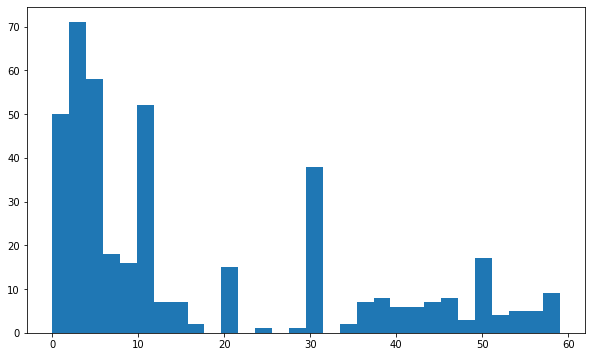

In [793]:
plt.figure(figsize=(10,6),facecolor='white')
plt.hist(df["tolerance"],bins=30)

In [794]:
df[df["tolerance"] == 100]

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq,tol_cat
